### Pyber Data Analysis

##### Datasets:
* data/city_data.csv
* data/ride_data.csv

##### Observable Trends:
* 

* 

* 
-----

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [2]:
# Set paths for data files
city_data_to_load = os.path.join('data', 'city_data.csv')
ride_data_to_load = os.path.join('data', 'ride_data.csv')

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
# Display city and ride tables for preview
# city_df.head()

In [4]:
# ride_df.head()

In [5]:
# Combine the data into a single dataset (merge the datasets on 'city' so that no data is lost)
merged_df = pd.merge(city_df, ride_df, on='city')

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data
Build a Bubble Plot that showcases the relationship between four key variables:
* Average fare ($) per city
* Total number of rides per city
* Total number of drivers per city
* City type (urban, suburban, rural)

In [6]:
# Group by type and city and use the agg method to performa basic calculations
city_groups_df = merged_df.groupby(['type', 'city']).agg({'fare':'mean',
                                                          'ride_id':'count',
                                                          'driver_count':'mean'})


In [7]:
# Use loc to retrieve data for each city type and rename col headers
urban_df = city_groups_df.loc['Urban'].rename(columns={'fare':'avg_fare',
                                                       'ride_id':'total_rides'})

rural_df = city_groups_df.loc['Rural'].rename(columns={'fare':'avg_fare',
                                                       'ride_id':'total_rides'})

suburban_df = city_groups_df.loc['Suburban'].rename(columns={'fare':'avg_fare',
                                                             'ride_id':'total_rides'})


In [8]:
# Obtain x and y coordinates for each city type
urban_x = urban_df['total_rides']
urban_y = urban_df['avg_fare']

rural_x = rural_df['total_rides']
rural_y = rural_df['avg_fare']

suburban_x = suburban_df['total_rides']
suburban_y = suburban_df['avg_fare']

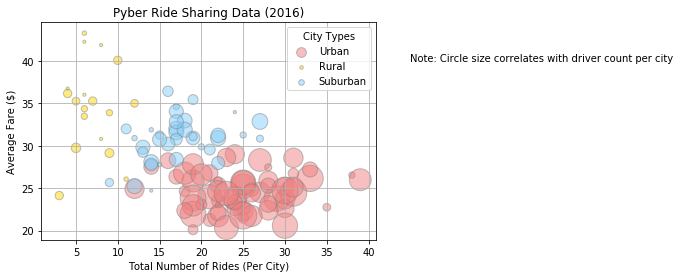

<Figure size 432x288 with 0 Axes>

In [9]:
# Build the scatter plot for each city type
marker = 'o'
edgecolors ='gray'
alpha = 0.5

# Urban
plt.scatter(urban_x,
            urban_y,
            marker = marker,
            facecolors = 'lightcoral',
            edgecolors = edgecolors,
            s = urban_df['driver_count'] * 10,
            label = 'Urban',
            alpha = alpha)

# Rural
plt.scatter(rural_x,
            rural_y,
            marker = marker,
            facecolors = 'gold',
            edgecolors = edgecolors,
            s = rural_df['driver_count'] * 10,
            label = 'Rural',
            alpha = alpha)

# Suburban
plt.scatter(suburban_x,
            suburban_y,
            marker = marker,
            facecolors = 'lightskyblue',
            edgecolors = edgecolors,
            s = suburban_df['driver_count'] * 10,
            label = 'Suburban',
            alpha = alpha)

# Add title and x and y axis labels
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Show grid
plt.grid(b = True, axis = 'both')

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc = 'best', markerscale = .5, title = 'City Types')

# Add a text label regarding circle size
plt.text(45, 40, 'Note: Circle size correlates with driver count per city')


# Save and show plot
plt.savefig('pyber-bubble-plot')
plt.show()

## Total Fares by City Type

In [10]:
# Calculate Type Percents
fares_percent = merged_df.groupby(['type'])
fares_percent = fares_percent[['fare']].sum().sort_values(by=['fare'], ascending=False)
fares_percent.apply(lambda x: x/x.sum()).reset_index()

,type,fare
0,Urban,0.627246
1,Suburban,0.304639
2,Rural,0.068115


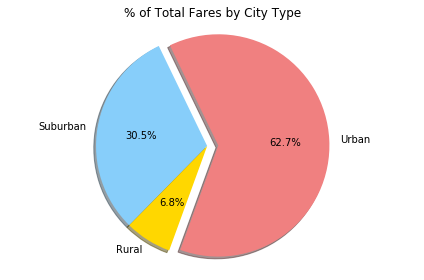

In [11]:
# Build Pie Chart

# Values of each section
sizes = fares_percent['fare']

# Only "explode" the 1st slice (should be the greatest %, since df was sorted)
explode = (0.1, 0, 0)

# Labels for each section
labels = fares_percent.index

# The colors of each section
colors = ['lightcoral', 'lightskyblue', 'gold']

# Create the pie chart based upon the values above
plt.pie(sizes,
        explode = explode,
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 250)

# Add title
plt.title('% of Total Fares by City Type')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Auto-adjust params
plt.tight_layout()

# Save and show plot
plt.savefig('fares-by-city-type')
plt.show()

## Total Rides by City Type

In [13]:
# Calculate Ride Percents



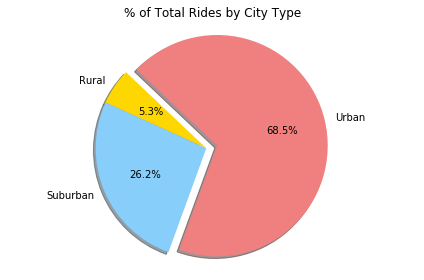

In [20]:
# Build Pie Chart

# Values of each section
sizes = [68.7, 5.3, 26.3] # *****NOTE **** Placeholder values to build chart -- will replace with calculated %'s from df'

# only "explode" the 1st slice (i.e. 'Urban')
explode = (0.1, 0, 0)

# Labels for each section
labels = 'Urban', 'Rural', 'Suburban'

# The colors of each section
colors = ['lightcoral', 'gold', 'lightskyblue']

# Create the pie chart based upon the values above
plt.pie(sizes,
        explode = explode,
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 250)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add title
plt.title('% of Total Rides by City Type')

# Auto-adjust params
plt.tight_layout()

# Save and show plot
plt.savefig('rides-by-city-type')
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Driver Percents


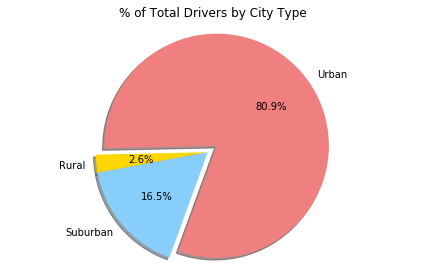

In [19]:
# Build Pie Chart

# Values of each section
sizes = [80.9, 2.6, 16.5] # *****NOTE **** Placeholder values to build chart -- will replace with calculated %'s from df'

# only "explode" the 1st slice (i.e. 'Urban')
explode = (0.1, 0, 0)

# Labels for each section
labels = 'Urban', 'Rural', 'Suburban'

# The colors of each section
colors = ['lightcoral', 'gold', 'lightskyblue']

# Create the pie chart based upon the values above
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=250)

# Add title
plt.title('% of Total Drivers by City Type')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Auto-adjust params
plt.tight_layout()

# Save and show plot
plt.savefig('drivers-by-city-type')

# Show plot
plt.show()